
# 🧩 Deep Learning Test Project (2 Hours)
## 🧠 Project Title: Rock–Paper–Scissors Image Classification using CNN

---

### 📄 Problem Statement
In this project, you will build and train a **Convolutional Neural Network (CNN)** to classify hand gesture images as **Rock, Paper, or Scissors**.
This project will test your understanding of CNN architecture, activation functions, and loss functions.

You will implement a complete pipeline — from data loading to evaluation — using TensorFlow/Keras.

---

### 🗂️ Dataset Information
**Dataset Name:** Rock–Paper–Scissors Image Dataset  
**Source:** [TensorFlow Datasets - Rock Paper Scissors](https://www.tensorflow.org/datasets/catalog/rock_paper_scissors)

```python
import tensorflow_datasets as tfds
dataset, info = tfds.load('rock_paper_scissors', as_supervised=True, with_info=True)
```

---

### 🎯 Objectives
1. Implement a CNN to classify images into Rock, Paper, or Scissors.  
2. Use ReLU activation in hidden layers and Softmax in the output layer.  
3. Use Categorical Crossentropy as the loss function.  
4. Evaluate and interpret model performance.  

---

## 🧩 Tasks to Perform

### ✅ Task 1 — Data Loading and Preprocessing (15 Marks)



### ✅ Task 2 — Model Building (30 Marks)




### ✅ Task 3 — Model Training (20 Marks)



### ✅ Task 4 — Model Evaluation (15 Marks)



### ✅ Task 5 — Conceptual Explanation (20 Marks)

**Q1:** Why do we use **ReLU** activation in CNN hidden layers?  
**Q2:** Why is **Softmax** used in the output layer?  
**Q3:** Why is **Categorical Crossentropy** used as the loss function here?  
**Q4:** Suggest one method to reduce overfitting.  

(Write your answers below in Markdown cells.)

---

### 🧠 Expected Learning Outcomes
- Understand how CNNs classify images.  
- Justify the use of activation and loss functions.  
- Visualize model performance with plots.  
- Connect CNN theory with real-world computer vision applications.  

---

### 🕒 Test Duration: 2 Hours
### 📊 Total Marks: 100


In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import tensorflow_datasets as tfds
dataset, info = tfds.load('rock_paper_scissors', as_supervised=True, with_info=True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.788PIO_3.0.0/rock_paper_scissors-train.tfre…

Generating test examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/rock_paper_scissors/incomplete.788PIO_3.0.0/rock_paper_scissors-test.tfrec…

Dataset rock_paper_scissors downloaded and prepared to /root/tensorflow_datasets/rock_paper_scissors/3.0.0. Subsequent calls will reuse this data.


In [ ]:
(train_ds, test_ds), ds_info = tfds.load(
    'rock_paper_scissors',
    split=['train', 'test'],
    as_supervised=True,
    with_info=True
)


In [ ]:
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
NUM_CLASSES = ds_info.features['label'].num_classes


In [ ]:
def preprocess(image, label):
    # Resize and normalize the image
    image = tf.image.resize(image, IMAGE_SIZE)
    image = tf.cast(image, tf.float32) / 255.0

    # One-hot encode the label
    label = tf.one_hot(label, NUM_CLASSES)

    return image, label


In [ ]:
train_data = train_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_data = test_ds.map(preprocess).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

print("Data loading and preprocessing complete.")
print(f"Number of training examples: {ds_info.splits['train'].num_examples}")
print(f"Number of testing examples: {ds_info.splits['test'].num_examples}")
print(f"Number of classes: {NUM_CLASSES}")


Data loading and preprocessing complete.
Number of training examples: 2520
Number of testing examples: 372
Number of classes: 3


In [ ]:
model = tf.keras.Sequential([
    # Input Layer
    tf.keras.layers.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)),

    # First Convolutional Block
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Second Convolutional Block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Third Convolutional Block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),

    # Flatten the feature maps
    tf.keras.layers.Flatten(),

    # Dense Layer
    tf.keras.layers.Dense(512, activation='relu'),

    # Output Layer
    tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])


In [ ]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    18,940,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │         1,539 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,035,203 (72.61 MB)

 Trainable params: 19,035,203 (72.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
print("\nStarting model training...")
history = model.fit(
    train_data,
    epochs=5,
    validation_data=test_data
)
print("Model training complete.")



Starting model training...
Epoch 1/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 140s 2s/step - accuracy: 0.5686 - loss: 1.2775 - val_accuracy: 0.8065 - val_loss: 0.4533
Epoch 2/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 0.9970 - loss: 0.0153 - val_accuracy: 0.8011 - val_loss: 0.5405
Epoch 3/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 128s 2s/step - accuracy: 0.9955 - loss: 0.0168 - val_accuracy: 0.8065 - val_loss: 0.8644
Epoch 4/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 129s 2s/step - accuracy: 0.9986 - loss: 0.0017 - val_accuracy: 0.8172 - val_loss: 1.0470
Epoch 5/5
79/79 ━━━━━━━━━━━━━━━━━━━━ 133s 2s/step - accuracy: 1.0000 - loss: 1.0520e-04 - val_accuracy: 0.8172 - val_loss: 1.1230
Model training complete.


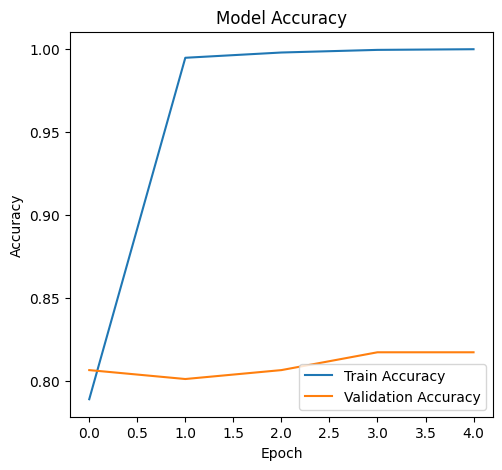

In [ ]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

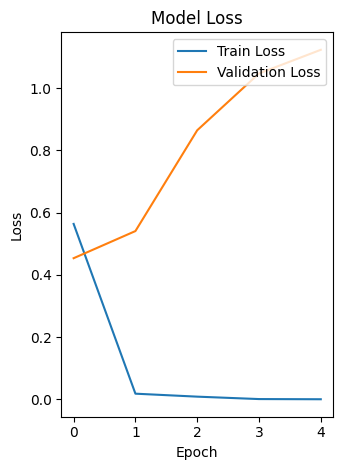

In [ ]:
# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(test_data)
print(f"\nTest Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.4f}")

12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 350ms/step - accuracy: 0.8431 - loss: 1.0362

Test Loss: 1.1230
Test Accuracy: 0.8172



--- Evaluating model with sample test images ---
Class names: ['rock', 'paper', 'scissors']
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


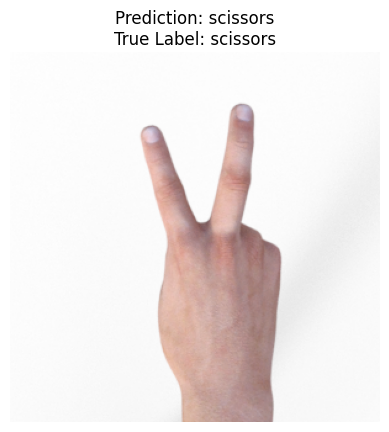

Sample 1:
  - True Label: scissors (2)
  - Predicted Label: scissors (2)
  - Confidence: 99.44%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


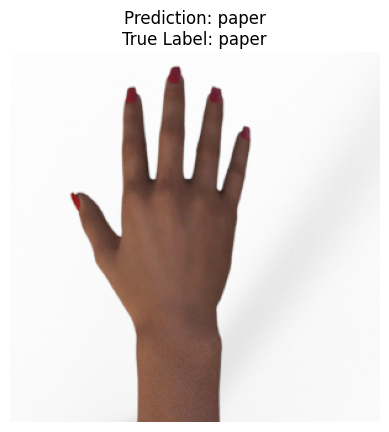

Sample 2:
  - True Label: paper (1)
  - Predicted Label: paper (1)
  - Confidence: 100.00%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step


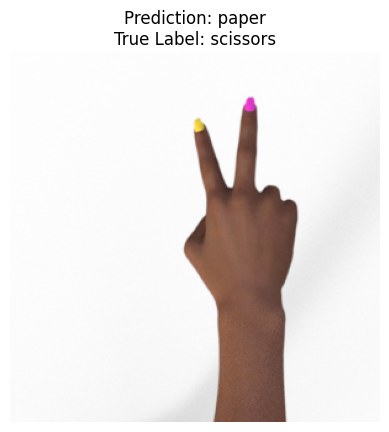

Sample 3:
  - True Label: scissors (2)
  - Predicted Label: paper (1)
  - Confidence: 100.00%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


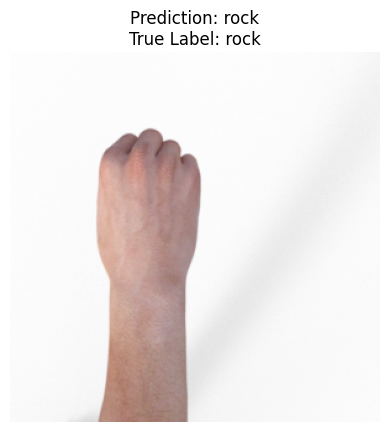

Sample 4:
  - True Label: rock (0)
  - Predicted Label: rock (0)
  - Confidence: 98.60%

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


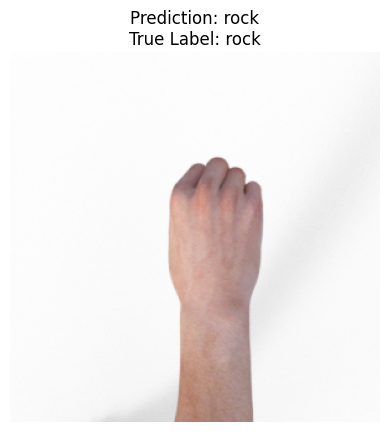

Sample 5:
  - True Label: rock (0)
  - Predicted Label: rock (0)
  - Confidence: 99.87%



In [ ]:
print("\n--- Evaluating model with sample test images ---")

# Get the class names from the dataset info
class_names = ds_info.features['label'].names
print(f"Class names: {class_names}")

# Get a few images from the original test dataset (before preprocessing and batching)
for i, (image, label) in enumerate(test_ds.take(5)):
    # The 'image' is a raw image tensor, and 'label' is its integer index

    # Preprocess the image for prediction
    # 1. Resize the image
    img_resized = tf.image.resize(image, IMAGE_SIZE)
    # 2. Normalize the pixel values
    img_normalized = img_resized / 255.0
    # 3. Add a batch dimension, as the model expects a batch of images
    img_batch = tf.expand_dims(img_normalized, 0)

    # Get the model's prediction
    prediction = model.predict(img_batch)

    # Get the predicted class index with the highest probability
    predicted_index = np.argmax(prediction)
    # Get the corresponding class name
    predicted_class_name = class_names[predicted_index]
    # Get the true class name
    true_class_name = class_names[label]

    # Display the image and the prediction
    plt.figure()
    plt.imshow(image)
    plt.title(f"Prediction: {predicted_class_name}\nTrue Label: {true_class_name}")
    plt.axis('off')
    plt.show()

    print(f"Sample {i+1}:")
    print(f"  - True Label: {true_class_name} ({label.numpy()})")
    print(f"  - Predicted Label: {predicted_class_name} ({predicted_index})")
    print(f"  - Confidence: {np.max(prediction)*100:.2f}%\n")


1. **Why ReLU in hidden layers?**
ReLU (Rectified Linear Unit) is used because it's computationally fast and helps prevent the "vanishing gradient" problem, allowing for more effective training of deep networks. It also promotes sparsity by setting negative inputs to zero, leading to more efficient learning.

2. **Why Softmax in the output layer?**
Softmax is used in the output layer of multi-class classification models to convert the raw scores (logits) into a probability distribution. This makes the output easily interpretable, showing the model's confidence for each class (e.g., Rock, Paper, Scissors).

3. **Why Categorical Crossentropy for loss?**
 Categorical Crossentropy is the standard loss function for multi-class classification. It measures how different the model's predicted probability distribution (from Softmax) is from the true label, effectively guiding the model to learn and improve its predictions.

4. **How to reduce overfitting?**
 A common method is Dropout, a regularization technique where a random fraction of neurons are ignored during training. This prevents the model from relying too heavily on any single neuron, forcing it to learn more robust features and improving its generalization to new, unseen data.